1. Gaussian process model


C:\Users\Physics\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


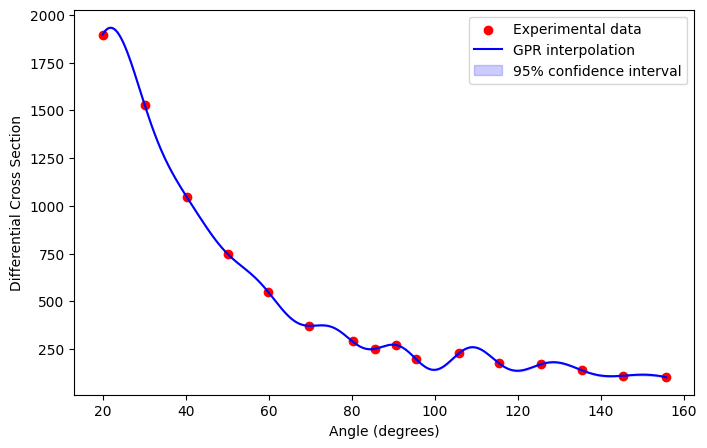

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# === 1. Read data from CSV ===
# Replace 'enguage.csv' with your filename
data = pd.read_csv("enguage.csv", header=None, skiprows=1)

angles = data[0].values.reshape(-1, 1)          # first column = angle
cross_section = data[1].values                  # second column = diff. cross-section

# === 2. Define Gaussian Process Regression ===
kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=1, length_scale_bounds=(1, 100))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the model
gpr.fit(angles, cross_section)

# === 3. Interpolation ===
X_pred = np.linspace(angles.min(), angles.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# === 4. Plot ===
plt.figure(figsize=(8,5))
plt.scatter(angles, cross_section, c="red", label="Experimental data")
plt.plot(X_pred, y_pred, "b-", label="GPR interpolation")
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma,
                 alpha=0.2, color="blue", label="95% confidence interval")
plt.xlabel("Angle (degrees)")
plt.ylabel("Differential Cross Section")
plt.legend()
plt.show()


In [3]:
import os
print("Current working directory:", os.getcwd())
print(os.listdir())


Current working directory: d:\6. PhD\Dr. Ali Onsi\trial\SKLEARN
['enguage.csv', 'Supervised.ipynb']


2. Piecewise Linear Interpolation

Connects points with straight lines, guaranteed to stay between them:

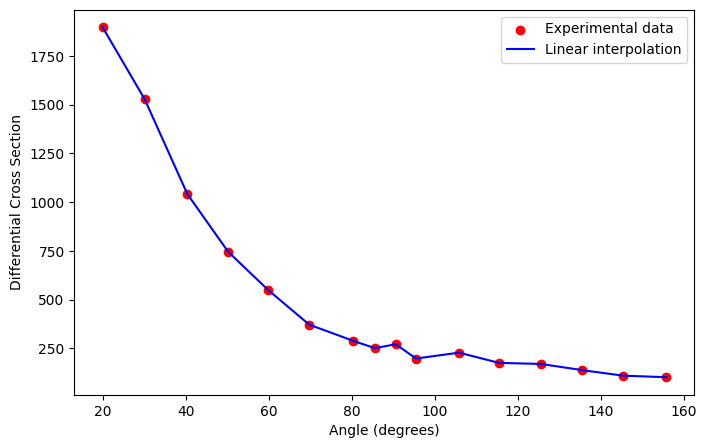

In [12]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

X_pred = np.linspace(angles.min(), angles.max(), 500)
linear_interp = interp1d(angles.ravel(), cross_section, kind='linear')
y_pred = linear_interp(X_pred)

plt.figure(figsize=(8,5))
plt.scatter(angles, cross_section, c="red", label="Experimental data")
plt.plot(X_pred, y_pred, "b-", label="Linear interpolation")
plt.xlabel("Angle (degrees)")
plt.ylabel("Differential Cross Section")
plt.legend()
plt.show()


3. Shape-Preserving Cubic Interpolation (PCHIP)

Smooth like cubic splines but never overshoots → always stays between your data points.
This is usually the best choice for experimental cross-section data.

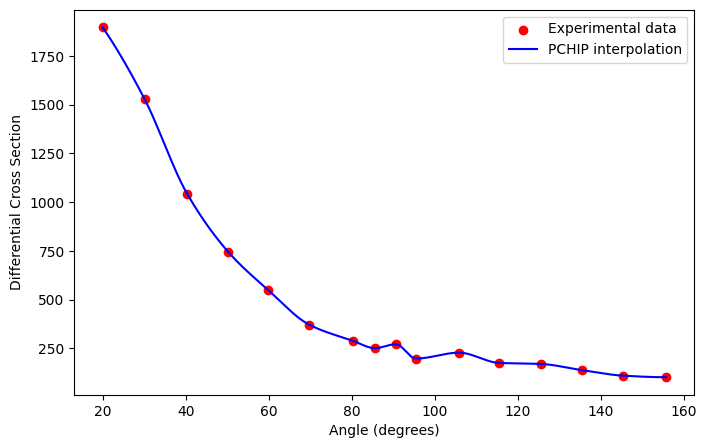

In [13]:
from scipy.interpolate import PchipInterpolator

X_pred = np.linspace(angles.min(), angles.max(), 500)
pchip = PchipInterpolator(angles.ravel(), cross_section)
y_pred = pchip(X_pred)

plt.figure(figsize=(8,5))
plt.scatter(angles, cross_section, c="red", label="Experimental data")
plt.plot(X_pred, y_pred, "b-", label="PCHIP interpolation")
plt.xlabel("Angle (degrees)")
plt.ylabel("Differential Cross Section")
plt.legend()
plt.show()


🔧 4. K-Nearest Neighbors Regression (KNN)

Very local, piecewise constant or weighted average.

Good for interpolation without wiggles.

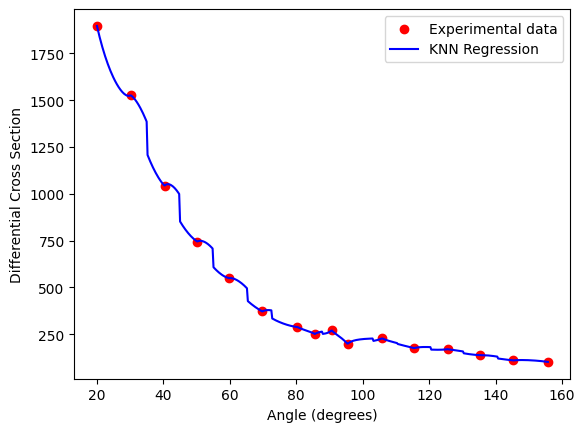

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn.fit(angles, cross_section)

X_pred = np.linspace(angles.min(), angles.max(), 500).reshape(-1, 1)
y_pred = knn.predict(X_pred)

plt.scatter(angles, cross_section, c="red", label="Experimental data")
plt.plot(X_pred, y_pred, "b-", label="KNN Regression")
plt.xlabel("Angle (degrees)")
plt.ylabel("Differential Cross Section")
plt.legend()
plt.show()


5. Support Vector Regression (SVR)

Good for smooth but flexible fits.

Kernel choices: "rbf", "linear", "poly".

Works well for scattering-like curves if tuned.

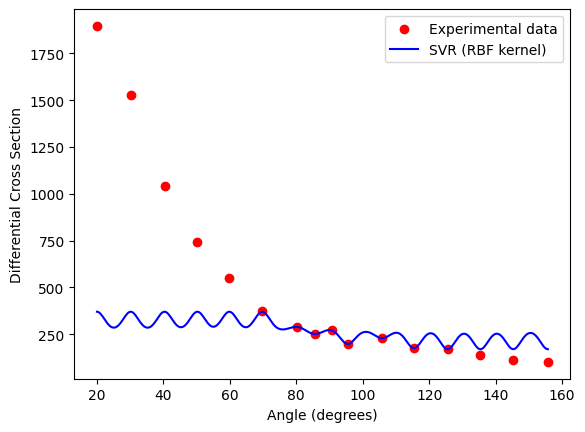

In [15]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1)
svr.fit(angles, cross_section)

y_pred = svr.predict(X_pred)

plt.scatter(angles, cross_section, c="red", label="Experimental data")
plt.plot(X_pred, y_pred, "b-", label="SVR (RBF kernel)")
plt.xlabel("Angle (degrees)")
plt.ylabel("Differential Cross Section")
plt.legend()
plt.show()


6. Random Forest Regressor

Ensemble of decision trees.

Pros: Captures local variations, non-linear.

Cons: May produce step-like curves (not smooth).

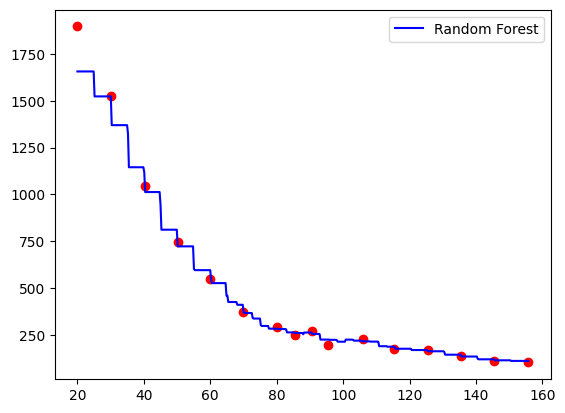

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(angles, cross_section)

y_pred = rf.predict(X_pred)

plt.scatter(angles, cross_section, c="red")
plt.plot(X_pred, y_pred, "b-", label="Random Forest")
plt.legend(); plt.show()


7. Gradient Boosting Regressor

More powerful than random forest, tends to be smoother.

C:\Users\Physics\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


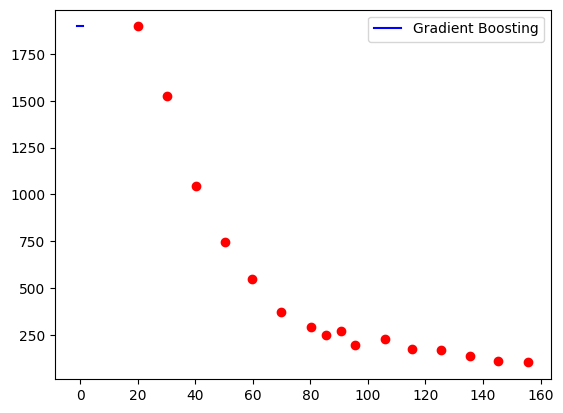

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3)
gbr.fit(angles, cross_section)

y_pred = gbr.predict(X_pred)

plt.scatter(angles, cross_section, c="red")
plt.plot(X_pred, y_pred, "b-", label="Gradient Boosting")
plt.legend(); plt.show()


8. Neural Network (MLPRegressor)

Learns non-linear functions, flexible if tuned well.

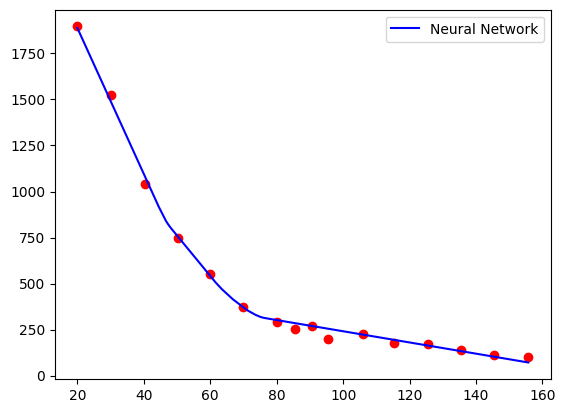

In [18]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=5000, random_state=42)
mlp.fit(angles, cross_section)

y_pred = mlp.predict(X_pred)

plt.scatter(angles, cross_section, c="red")
plt.plot(X_pred, y_pred, "b-", label="Neural Network")
plt.legend(); plt.show()


🔬 What is a PINN?

A Physics-Informed Neural Network (PINN) is a neural network trained not just on data points but also on the physical equations (differential equations, constraints, or conservation laws) that govern the system.

Ordinary ML models (SVR, Random Forest, MLP, etc.) only learn to minimize the error between predicted and experimental data.

PINNs, in contrast, add a physics loss term (e.g., satisfying the Schrödinger equation, scattering theory constraints, or boundary conditions) to the training objective.

The loss function typically looks like:



⚛️ Why PINNs for Nuclear Scattering?

For your case (U-235 + neutron differential cross-sections):

Data limitation: Experimental data often exist at discrete energies and angles. PINNs can interpolate between them while respecting physics.

Smoothness & constraints: Unlike black-box models, PINNs can enforce:

symmetry in scattering angle positivity of cross-section, known asymptotic limits.

Generalization: PINNs can extrapolate better than pure ML, because they are anchored in physics.

Epoch 0, Loss=0.102827
Epoch 1000, Loss=0.000106
Epoch 2000, Loss=0.000094
Epoch 3000, Loss=0.000071
Epoch 4000, Loss=0.000057
Epoch 5000, Loss=0.000055
Epoch 6000, Loss=0.000054
Epoch 7000, Loss=0.000053
Epoch 8000, Loss=0.000052
Epoch 9000, Loss=0.000052


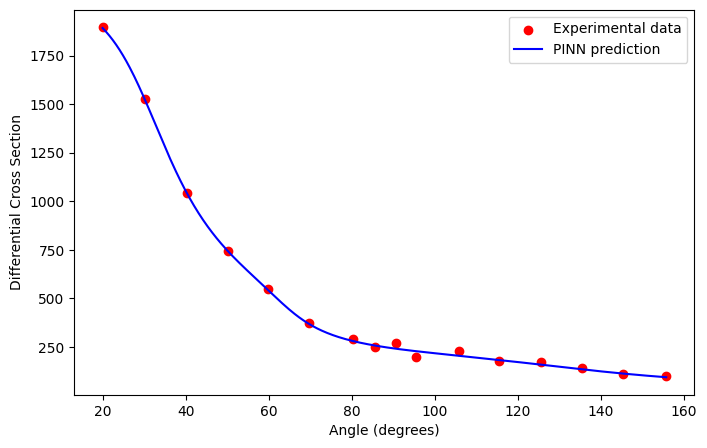

In [23]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Load Data ===
data = pd.read_csv("enguage.csv", header=0)   # has headers "x" and "Curve1"
angles = torch.tensor(data["x"].values, dtype=torch.float32).view(-1,1)
cross_section = torch.tensor(data["Curve1"].values, dtype=torch.float32).view(-1,1)

# Save original numpy for plotting
angles_np = angles.detach().cpu().numpy()
cross_section_np = cross_section.detach().cpu().numpy()

# === 2. Normalize data ===
# scale x to [-1,1]
angles_min, angles_max = angles.min(), angles.max()
angles_scaled = 2 * (angles - angles_min) / (angles_max - angles_min) - 1

# scale y to [0,1]
cs_min, cs_max = cross_section.min(), cross_section.max()
cross_section_scaled = (cross_section - cs_min) / (cs_max - cs_min)

# === 3. Neural network model ===
class PINN(nn.Module):
    def __init__(self, hidden=5, neurons=64):
        super(PINN, self).__init__()
        layers = []
        layers.append(nn.Linear(1, neurons))
        layers.append(nn.Tanh())
        for _ in range(hidden-1):
            layers.append(nn.Linear(neurons, neurons))
            layers.append(nn.Tanh())
        layers.append(nn.Linear(neurons, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

model = PINN()

# === 4. Optimizer ===
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# === 5. Loss (fit only data first, physics optional) ===
loss_fn = nn.MSELoss()

# === 6. Training Loop ===
for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model(angles_scaled)
    data_loss = loss_fn(y_pred, cross_section_scaled)
    data_loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss={data_loss.item():.6f}")

# === 7. Prediction on fine grid ===
X_pred = torch.linspace(-1, 1, 500).view(-1,1)
y_pred_scaled = model(X_pred).detach()

# Rescale back to physical units
y_pred = y_pred_scaled * (cs_max - cs_min) + cs_min
X_pred_phys = (X_pred+1)/2 * (angles_max - angles_min) + angles_min

# === 8. Plot ===
plt.figure(figsize=(8,5))
plt.scatter(angles_np, cross_section_np, c="red", label="Experimental data")
plt.plot(X_pred_phys.detach().numpy(), y_pred.detach().numpy(), "b-", label="PINN prediction")
plt.xlabel("Angle (degrees)")
plt.ylabel("Differential Cross Section")
plt.legend()
plt.show()
